In [1]:
import uproot as up
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd

In [2]:
MCLund_pref = "/w/hallb-scshelf2102/clas12/users/rojokell/MCLundAnalysis/"
day_dir_driver = "September_25"
day_dir = "September_24"

In [3]:
# driver_low = up.concatenate(MCLund_pref + f"Analysis/BoxAffinity/root_files/{day_dir}/old_R2_driver_low.root:tree_driver")
driver_MCNP = up.concatenate(MCLund_pref + f"Analysis/BoxAffinity/root_files/{day_dir_driver}/old_R2_driver_MCNP_all_All.root:tree_driver")
driver = up.concatenate(MCLund_pref + f"Analysis/BoxAffinity/root_files/{day_dir_driver}/old_R2_driver_All.root:tree_driver")
MC = up.concatenate(MCLund_pref + f"OutputFiles/Files_Spring_24/{day_dir}/run_1_100kevents.root:tree_MC")

In [67]:
driver_MCNP

<Array [{R0: 0.459, R1: 0.372, ...}, ...] type='100001 * {R0: float64, R1: ...'>

## Plotting Ratios for MCNP and for MC

In [7]:
#cut distributions:
MC_cut_first = [[],[],[]]
MC_cut_second = [[],[],[]]
driver_MCNP_cut_first = [[],[],[]]
driver_MCNP_cut_second = [[],[],[]]
# driver_MCNP_cut = driver_MCNP_low
cut_lower_bound = -1
cut_upper_bound = 1
for i in range(3):
    MC_cut_first[i] = MC[f"R{i}"][MC[f"R{i}"] > cut_lower_bound]
    MC_cut_second[i] = MC_cut_first[i][MC_cut_first[i] < cut_upper_bound]
    driver_MCNP_cut_first[i] = driver_MCNP[f"R{i}"][driver_MCNP[f"R{i}"] > cut_lower_bound]
    driver_MCNP_cut_second[i] = driver_MCNP_cut_first[i][driver_MCNP_cut_first[i] < cut_upper_bound]

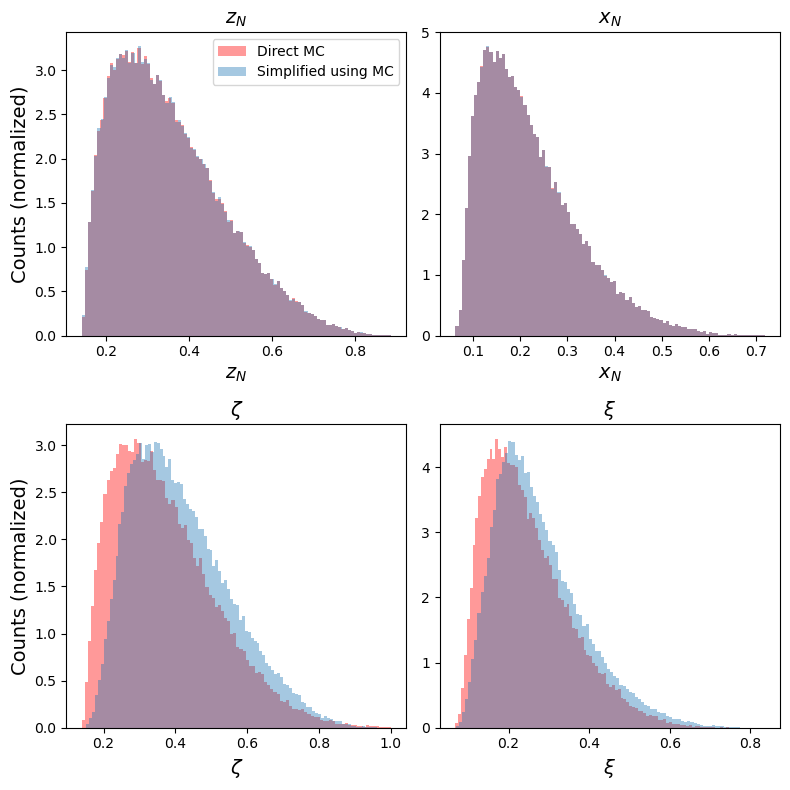

In [40]:
fig_zx,axs_zx = plot.subplots(2,2,figsize = (8,8))
titles = [r"$z_N$",r"$x_N$",r"$\zeta$",r"$\xi$"]
keys = ["z_N","x_N","zeta","xi"]
x_labels = [r"$z_N$",r"$x_N$",r"$\zeta$",r"$\xi$"]
for i in range(4):
    col = i % 2
    row = i // 2
    if(i == 2):
        zeta = MC[keys[i]]
        zeta = zeta[zeta < 1]
        axs_zx[row,col].hist(zeta,bins = 100,color = "red",alpha = 0.4,density=True,label = "Direct MC");
    else:
        axs_zx[row,col].hist(MC[keys[i]],bins = 100,color = "red",alpha = 0.4,density=True,label = "Direct MC");
    axs_zx[row,col].hist(driver[keys[i]],bins = 100,alpha = 0.4,density=True,label = "Simplified using MC");
    axs_zx[row,col].set_title(titles[i],fontsize=14)
    axs_zx[row,col].set_xlabel('xlabel', fontsize=14)
    axs_zx[row,col].set_xlabel(x_labels[i])
axs_zx[0][0].legend()
# axs_zx[1][0].set_ylim(0,1)
# axs_zx[1][0].set_xlim(0,10)
axs_zx[0][0].set_ylabel("Counts (normalized)", fontsize=14)
axs_zx[1][0].set_ylabel("Counts (normalized)",fontsize = 14)
fig_zx.tight_layout()
fig_zx.savefig("BoxAffinity/Plots_S24/DNP/x_N_z_N_oct_1.pdf")

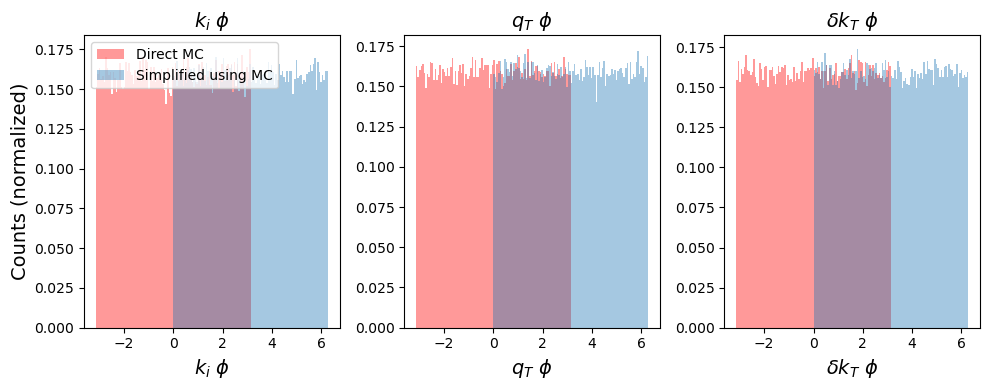

In [26]:
fig_kin,axs_kin = plot.subplots(1,3,figsize = (10,4))
titles = [r"$k_i$ $\phi$",r"$q_T$ $\phi$",r"$\delta k_T$ $\phi$"]
keys = ["theta_ki","theta_H","theta_deltak"]
x_labels = [r"$k_i$ $\phi$",r"$q_T$ $\phi$",r"$\delta k_T$ $\phi$"]
for i in range(3):
    axs_kin[i].hist(MC[keys[i]],bins = 100,color = "red",alpha = 0.4,density=True,label = "Direct MC");
    axs_kin[i].hist(driver[keys[i]],bins = 100,alpha = 0.4,density=True,label = "Simplified using MC");
    # axs_kin[i].set_xlim(0,1);
    axs_kin[i].set_title(titles[i],fontsize=14)
    axs_kin[i].set_xlabel('xlabel', fontsize=14)
    axs_kin[i].set_xlabel(x_labels[i])
axs_kin[0].legend()
axs_kin[0].set_ylabel('ylabel', fontsize=14)

axs_kin[0].set_ylabel("Counts (normalized)")
fig_kin.tight_layout()
fig_kin.savefig("BoxAffinity/Plots_S24/DNP/angles_oct_1.pdf")

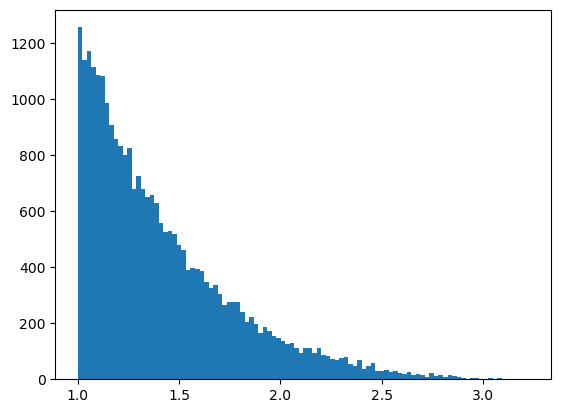

In [57]:
plot.hist(MC["qTQ_HF"][MC["qTQ_HF"] > 1],bins = 100);

In [58]:
len(MC["qTQ_HF"][MC["qTQ_HF"] > 1])

27013

Text(0.5, 0, '$R_1$')

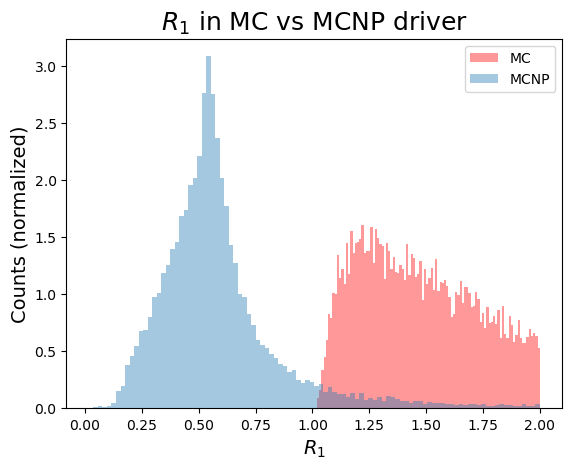

In [85]:
'''CHOOSE ONE OF THE BELOW OPTIONS'''

qtcut = 1
qtcut_type = "gt"

# qtcut = 0.2
# qtcut_type = "lt"

'''END OF OPTIONS'''


ratios = [MC['R0'],MC['R1'],MC['R2']]
MCNP_ratios = [driver_MCNP['R0'],driver_MCNP['R1'],driver_MCNP['R2']]


for i in range(3):
    if(qtcut_type == "gt"):
        ratios[i] = ratios[i][MC["qTQ_HF"] >qtcut]
        MCNP_ratios[i] = MCNP_ratios[i][driver_MCNP["qTQ_hadron"] >qtcut]
    else:
        ratios[i] = ratios[i][MC["qTQ_HF"] <qtcut]
        MCNP_ratios[i] = MCNP_ratios[i][driver_MCNP["qTQ_hadron"] <qtcut]
ratios_cut = [[],[],[]]
ratios_cut2 = [[],[],[]]
MCNP_ratios_cut = [[],[],[]]
MCNP_ratios_cut2 = [[],[],[]]
ub = 2
lb = 0
for i in range(3):
    ratios_cut[i] = ratios[i][ratios[i] > lb]
    ratios_cut2[i] = ratios_cut[i][ratios_cut[i] < ub]
    MCNP_ratios_cut[i] = MCNP_ratios[i][MCNP_ratios[i] > lb]
    MCNP_ratios_cut2[i] = MCNP_ratios_cut[i][MCNP_ratios_cut[i] < ub]

plot.hist(ratios_cut2[1],bins = 100,alpha = 0.4,density = True,color = "red",label = "MC");
plot.hist(MCNP_ratios_cut2[1],bins = 100,alpha = 0.4,density = True, label = "MCNP");
plot.legend()
plot.title(r"$R_1$ in MC vs MCNP driver",fontsize = 18)
plot.ylabel("Counts (normalized)",fontsize = 14)
plot.xlabel(r"$R_1$",fontsize = 14)

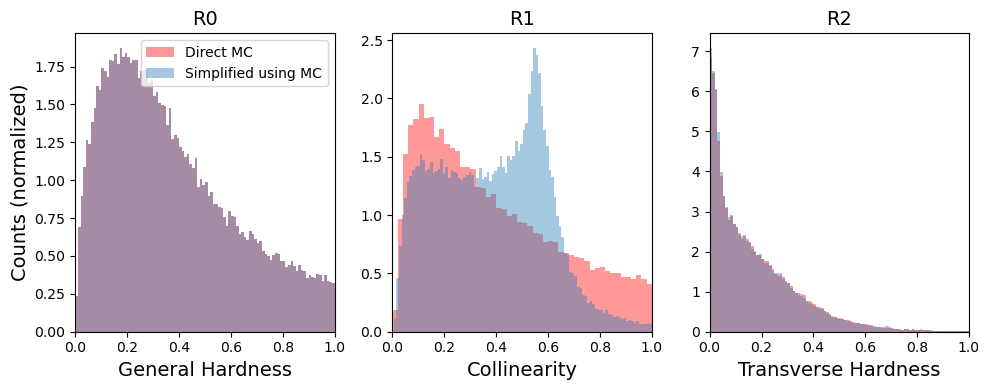

In [15]:
fig_ratios,axs_ratios = plot.subplots(1,3,fig_ratiossize = (10,4))
titles = ["R0","R1","R2"]
x_labels = ["General Hardness","Collinearity","Transverse Hardness"]
for i in range(3):
    axs_ratios[i].hist(MC_cut_second[i],bins = 100,color = "red",alpha = 0.4,density=True,label = "Direct MC");
    axs_ratios[i].hist(driver_MCNP_cut_second[i],bins = 100,alpha = 0.4,density=True,label = "Simplified using MC");
    axs_ratios[i].set_xlim(0,1);
    axs_ratios[i].set_title(titles[i],fontsize=14)
    axs_ratios[i].set_xlabel('xlabel', fontsize=14)
    axs_ratios[i].set_xlabel(x_labels[i])
axs_ratios[0].legend()
axs_ratios[0].set_ylabel('ylabel', fontsize=14)

axs_ratios[0].set_ylabel("Counts (normalized)")
fig_ratios.tight_layout()
fig_ratios.savefig("BoxAffinity/Plots_S24/DNP/ratios_comp_oct_1.pdf")

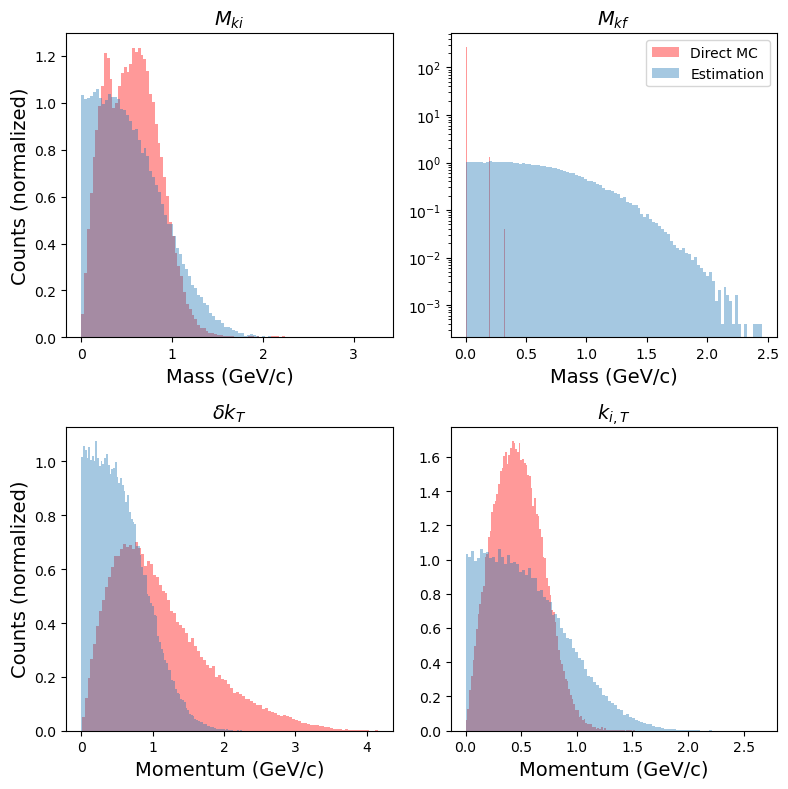

In [42]:
fig_partons, axs_partons = plot.subplots(2,2,figsize = (8,8))
parton_keys = ["M_ki","M_kf","delta_k_t","ki_t"]
titles = [r"$M_{ki}$",r"$M_{kf}$",r"$\delta k_T$",r"$k_{i,T}$"]
x_labels = ["Mass (GeV/c)","Mass (GeV/c)","Momentum (GeV/c)","Momentum (GeV/c)"]
# fig_partons.suptitle("Partonic Variables")
for i in range(4):
    col = i % 2
    row = i // 2
    axs_partons[row,col].hist(MC[parton_keys[i]],bins = 100,color = "red",alpha = 0.4,density=True,label = "Direct MC");
    axs_partons[row,col].hist(driver[parton_keys[i]],bins = 100,alpha = 0.4,density=True,label = "Estimation");
    axs_partons[row,col].set_title(titles[i],fontsize=14)
    axs_partons[row,col].set_xlabel('xlabel', fontsize=14)
    axs_partons[row,col].set_xlabel(x_labels[i])
axs_partons[0,1].legend()

axs_partons[0,0].set_ylabel("Counts (normalized)", fontsize=14)
axs_partons[1,0].set_ylabel("Counts (normalized)", fontsize=14)
# axs_partons[1].set_ylim(0,50)
axs_partons[0,1].set_yscale('log')
fig_partons.tight_layout()
fig_partons.savefig("BoxAffinity/Plots_S24/DNP/partons_oct_1.pdf")

# OLD

ValueError: the truth value of an array whose length is not 1 is ambiguous; use ak.any() or ak.all()

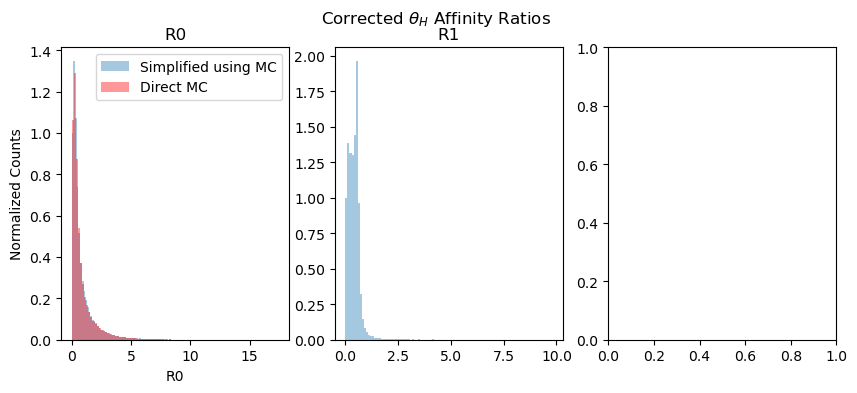

In [9]:
fig_R, axs_R = plot.subplots(1,3,figsize = (10,3.8))
fig_R.suptitle(r"Corrected $\theta_H$ Affinity Ratios")
axs_R[0].set_title("R0")
axs_R[0].hist(driver_MCNP_low["R0"],bins = 100,alpha = 0.4,density=True,label = "Simplified using MC");
axs_R[0].hist(MC_low["R0"],bins = 100,color = "red",alpha = 0.4,density=True,label = "Direct MC");
axs_R[0].legend()
axs_R[0].set_xlabel("R0")
axs_R[0].set_ylabel("Normalized Counts")

axs_R[1].set_title("R1")
axs_R[1].hist(driver_MCNP_low["R1"][driver_MCNP_low["R1"] < 10],bins = 100,alpha = 0.4,density=True,label = "Simplified using MC");
axs_R[1].hist(MC_low["R1"][MC_low["R1"]],bins = 100,color = "red",alpha = 0.4,density=True,label = "Direct MC");
axs_R[1].legend()
axs_R[1].set_xlabel("R1")

axs_R[2].set_title("R2")
axs_R[2].hist(driver_MCNP_low["R2"][driver_MCNP_low["R2"] < 10],bins = 100,alpha = 0.4,density=True,label = "Simplified using MC");
axs_R[2].hist(MC_low["R2"],bins = 100,color = "red",alpha = 0.4,density=True,label = "Direct MC");
axs_R[2].legend()
axs_R[2].set_xlabel("R2")
fig_R.tight_layout()
fig_R.savefig("Histos/Sept_25_ratios_no_binning.jpeg", dpi=600)

## Plotting partonic distributions for MC and driver

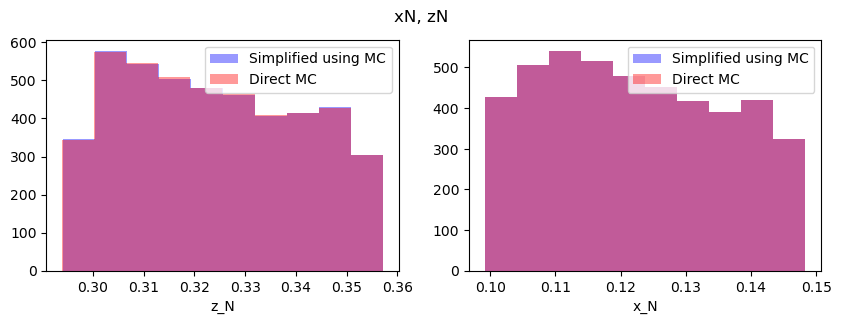

In [23]:
xzfig, xzax = plot.subplots(1,2, figsize = (10,3))
xzfig.suptitle("xN, zN")
xzax[0].hist(driver_MCNP_low["z_N"],color = "blue", alpha = 0.4,label = "Simplified using MC");
xzax[0].hist(MC_low["z_N"],color = "red", alpha = 0.4,label = "Direct MC");
xzax[0].set_xlabel("z_N")
xzax[1].hist(driver_MCNP_low["x_N"],color = "blue", alpha = 0.4,label = "Simplified using MC");
xzax[1].hist(MC_low["x_N"],color = "red", alpha = 0.4,label = "Direct MC");
xzax[1].set_xlabel("x_N")
xzax[0].legend()
xzax[1].legend()
plot.show()
xzfig.savefig("Plots_S24/September_24/xzn.pdf")

In [16]:
driver_arrs = [driver_low["M_ki"],driver_low["M_kf"],driver_low["delta_k_t"],driver_low["ki_t"],driver_low["zeta"],driver_low["xi"],driver_low["theta_deltak"],driver_low["theta_H"],driver_low["theta_ki"]]
driver_MCNP_arrs = [driver_MCNP_low["M_ki"],driver_MCNP_low["M_kf"],driver_MCNP_low["delta_k_t"],driver_MCNP_low["ki_t"],driver_MCNP_low["zeta"],driver_MCNP_low["xi"],driver_MCNP_low["theta_deltak"],driver_MCNP_low["theta_H"],driver_MCNP_low["theta_ki"]]
MC_arrs = [MC_low["M_ki"],MC_low["M_kf"],MC_low["delta_k_t"],MC_low["ki_t"],MC_low["zeta"],MC_low["xi"],MC_low["theta_deltak"],MC_low["theta_H"],MC_low["theta_ki"]]

In [17]:
driver_Rs = [driver_low["R0"],driver_low["R1"],driver_low["R2"]]
MC_Rs = [MC_low["R0"],MC_low["R1"],MC_low["R2"]]
driver_MCNP_Rs = [driver_MCNP_low["R0"],driver_MCNP_low["R1"],driver_MCNP_low["R2"]]

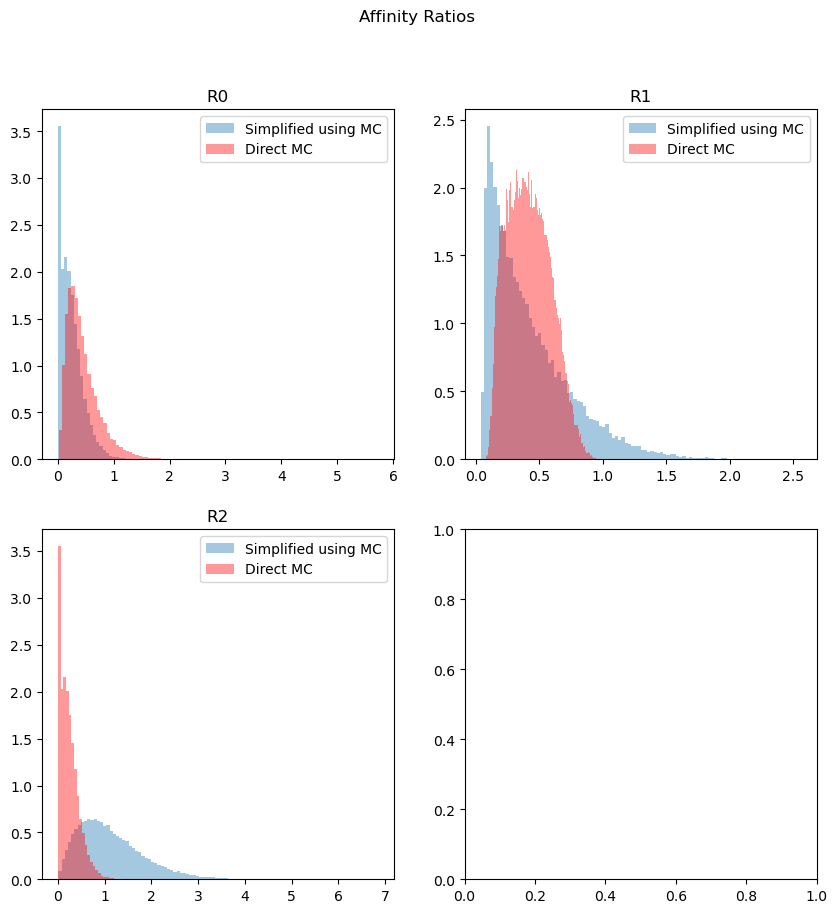

In [18]:
fig_R_old, axs_R_old = plot.subplots(2,2,figsize = (10,10))
fig_R_old.suptitle("Affinity Ratios")
axs_R_old[0,0].set_title("R0")
axs_R_old[0,0].hist(driver_MCNP_low["R0"],bins = 100,alpha = 0.4,density=True,label = "Simplified using MC");
axs_R_old[0,0].hist(MC_low["R0"],bins = 100,color = "red",alpha = 0.4,density=True,label = "Direct MC");
axs_R_old[0,0].legend()

axs_R_old[0,1].set_title("R1")
axs_R_old[0,1].hist(driver_MCNP_low["R1"][driver_MCNP_low["R1"] < 10],bins = 100,alpha = 0.4,density=True,label = "Simplified using MC");
axs_R_old[0,1].hist(MC_low["R1"],bins = 100,color = "red",alpha = 0.4,density=True,label = "Direct MC");
axs_R_old[0,1].legend()

axs_R_old[1,0].set_title("R2")
axs_R_old[1,0].hist(driver_MCNP_low["R2"][driver_MCNP_low["R2"] < 10],bins = 100,alpha = 0.4,density=True,label = "Simplified using MC");
axs_R_old[1,0].hist(MC_low["R2"],bins = 100,color = "red",alpha = 0.4,density=True,label = "Direct MC");
axs_R_old[1,0].legend()
fig_R_old.savefig("Histos/Aug_26_ratios_MCNP_MC_bug.pdf")

In [6]:
zeta_MC = MC_arrs[4]

In [7]:
zeta_MC_cut = zeta_MC[zeta_MC < 10]

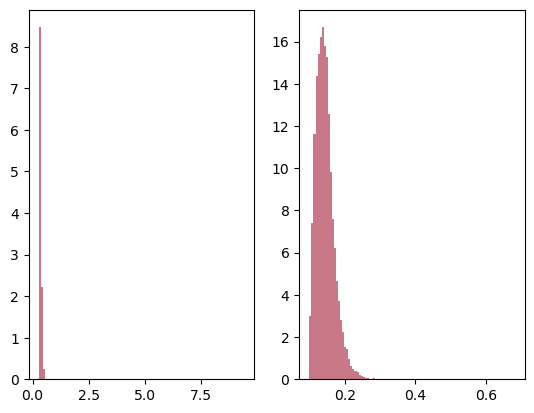

In [8]:
fig_xz, axs_xz = plot.subplots(1,2)
axs_xz[0].hist(driver_MCNP_arrs[4][driver_MCNP_arrs[4] < 10],bins = 100,alpha = 0.4,density = True);
axs_xz[0].hist(zeta_MC_cut,bins = 100,color = "red",alpha = 0.4,density = True);

axs_xz[1].hist(driver_MCNP_arrs[5],bins = 100,alpha = 0.4,density = True);
axs_xz[1].hist(MC_arrs[5],bins = 100,color = "red",alpha = 0.4,density = True);
# fig_xz, axs_xz = plot.subplots(2,2)
# axs_xz[0,0].hist(driver_arrs[4],bins = 100,alpha = 0.4,density = True);
# axs_xz[0,1].hist(zeta_MC_cut,bins = 100,color = "red",alpha = 0.4,density = True);

# axs_xz[1,0].hist(driver_arrs[5],bins = 100,alpha = 0.4,density = True);
# axs_xz[1,1].hist(MC_arrs[5],bins = 100,color = "red",alpha = 0.4,density = True);

# fig_xz, axs_xz = plot.subplots(3,2,figsize=(12,16))
# axs_xz[0,0].hist(driver_arrs[4][driver_arrs[4] < 10],bins = 100,alpha = 0.4,density = True);
# axs_xz[1,0].hist(zeta_MC_cut,bins = 100,color = "red",alpha = 0.4,density = True);
# axs_xz[2,0].hist(driver_MCNP_arrs[4][driver_MCNP_arrs[4] < 10] ,bins = 100,color = "green",alpha = 0.4,density = True);

# axs_xz[0,1].hist(driver_arrs[5],bins = 100,alpha = 0.4,density = True);
# axs_xz[1,1].hist(MC_arrs[5],bins = 100,color = "red",alpha = 0.4,density = True);
# axs_xz[2,1].hist(driver_MCNP_arrs[5],bins = 100,color = "green",alpha = 0.4,density = True);

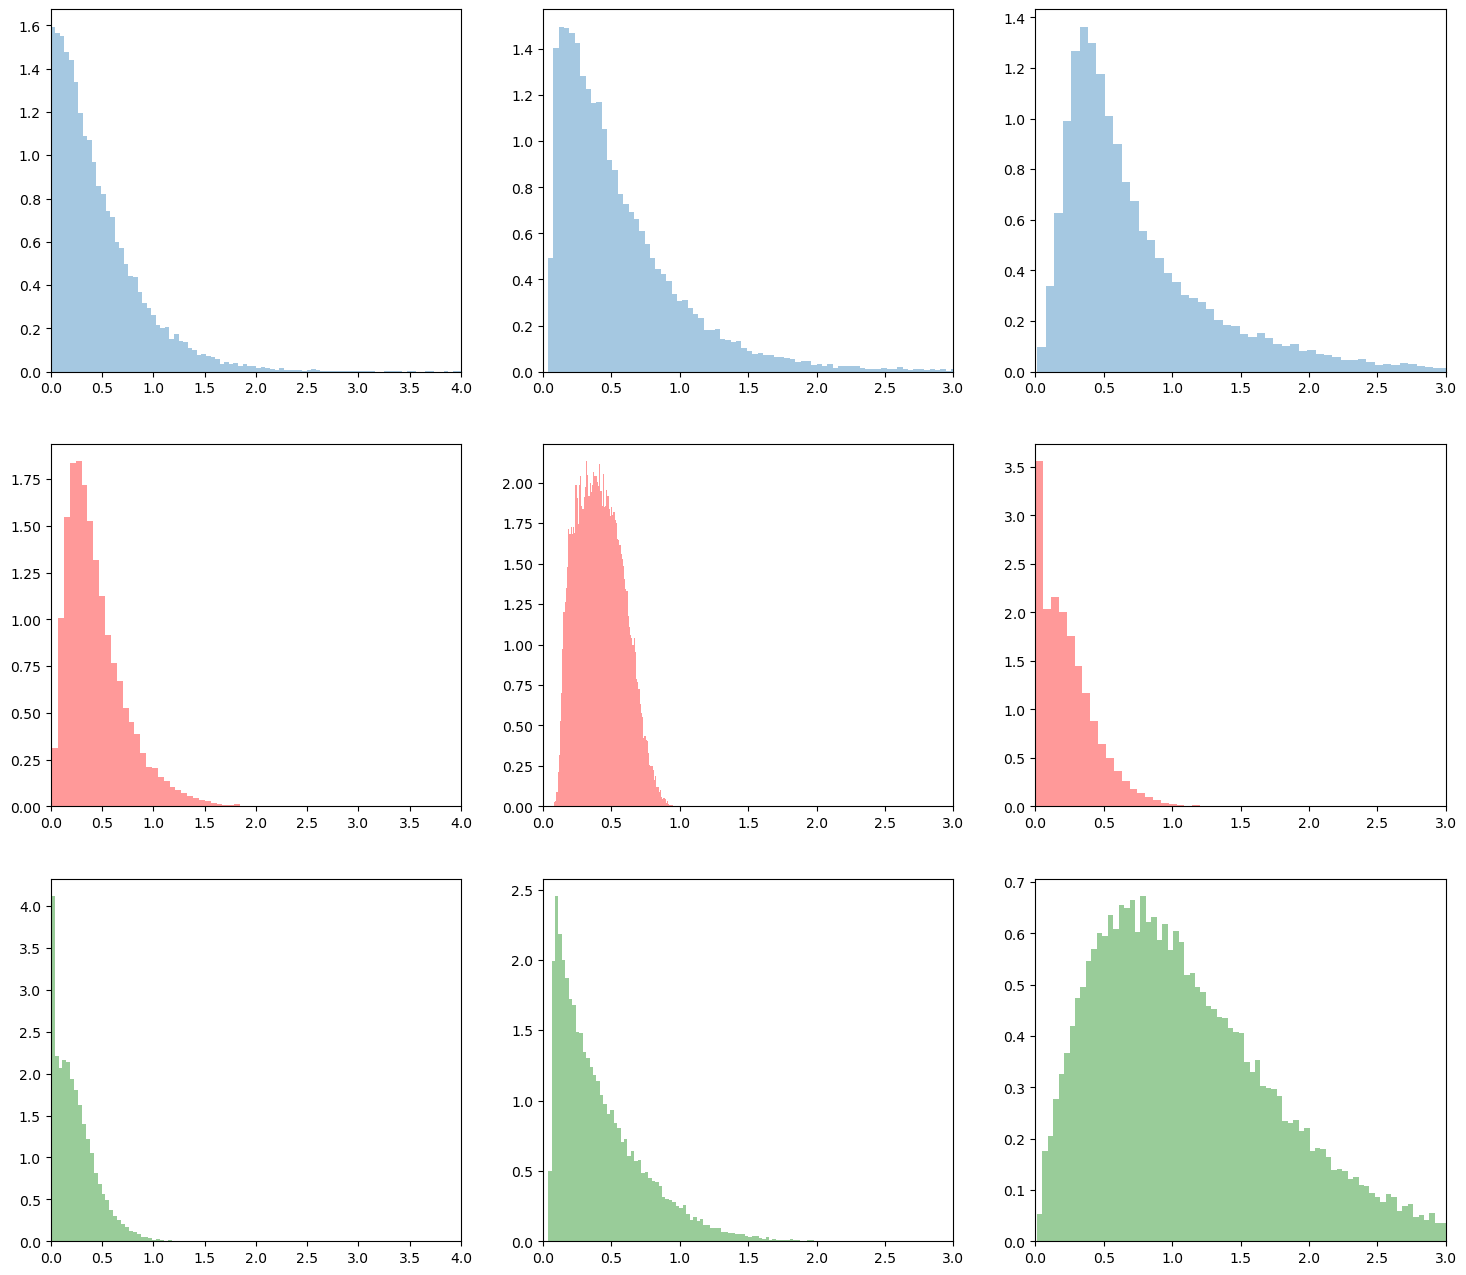

In [11]:
fig_xz, axs_xz = plot.subplots(3,3,figsize=(18,16))
axs_xz[0,0].hist(driver_Rs[0],bins = 100,alpha = 0.4,density = True);
axs_xz[0,0].set_xlim(0,4)
axs_xz[1,0].set_xlim(0,4)
axs_xz[2,0].set_xlim(0,4)
axs_xz[1,0].hist(MC_Rs[0],bins = 100,color = "red",alpha = 0.4,density = True);
axs_xz[2,0].hist(driver_MCNP_Rs[0][driver_MCNP_Rs[0] < 4],bins = 100,color = "green",alpha = 0.4,density = True);

axs_xz[0,1].hist(driver_Rs[1][driver_Rs[1] < 4],bins = 100,alpha = 0.4,density = True);
axs_xz[0,1].set_xlim(0,3)
axs_xz[1,1].set_xlim(0,3)
axs_xz[2,1].set_xlim(0,3)
axs_xz[1,1].hist(MC_Rs[1],bins = 100,color = "red",alpha = 0.4,density = True);
axs_xz[2,1].hist(driver_MCNP_Rs[1][driver_MCNP_Rs[1] < 4],bins = 100,color = "green",alpha = 0.4,density = True);

axs_xz[0,2].hist(driver_Rs[2],bins = 100,alpha = 0.4,density = True);
axs_xz[0,2].set_xlim(0,3)
axs_xz[1,2].set_xlim(0,3)
axs_xz[2,2].set_xlim(0,3)
axs_xz[1,2].hist(MC_Rs[2],bins = 100,color = "red",alpha = 0.4,density = True);
axs_xz[2,2].hist(driver_MCNP_Rs[2][driver_MCNP_Rs[2] < 4],bins = 100,color = "green",alpha = 0.4,density = True);

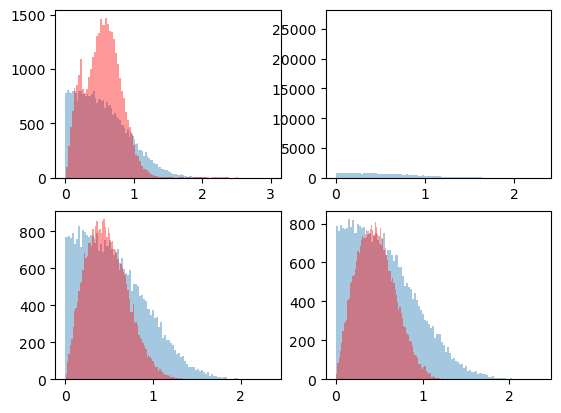

In [11]:
fig, axs = plot.subplots(2,2)
axs[0,0].hist(driver_arrs[0],bins = 100,alpha = 0.4);
axs[0,0].hist(MC_arrs[0],bins = 100,color = "red",alpha = 0.4);

axs[0,1].hist(driver_arrs[1],bins = 100,alpha = 0.4);
axs[0,1].hist(MC_arrs[1],bins = 100,color = "red",alpha = 0.4);

axs[1,0].hist(driver_arrs[2],bins = 100,alpha = 0.4);
axs[1,0].hist(MC_arrs[2],bins = 100,color = "red",alpha = 0.4);

axs[1,1].hist(driver_arrs[3],bins = 100,alpha = 0.4);
axs[1,1].hist(MC_arrs[3],bins = 100,color = "red",alpha = 0.4);

In [108]:
def T(k):
    i = np.array([1j])
    return k**2 / np.abs(np.exp(4 * i * k) + (k + i) ** 2)




x_vals = np.linspace(-50,50,10000)
y_vals = np.empty(x_vals.shape)
for x_idx in range(x_vals.shape[0]):
    y_vals[x_idx] = T(x_vals[x_idx])[0]
 

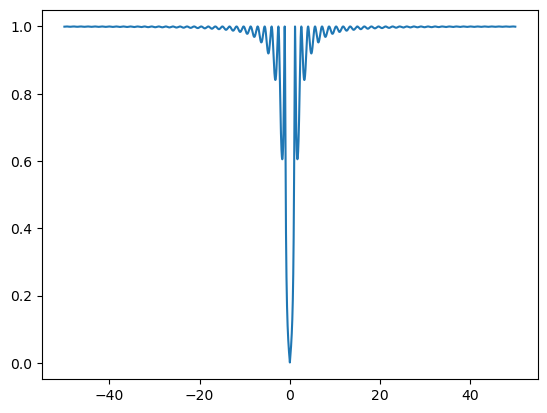

In [109]:
plot.plot(x_vals,y_vals)